In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('wholesale_customers.csv')

In [3]:
data.shape

(440, 8)

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [6]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
standardScaler = StandardScaler()
scales_data = pd.DataFrame(standardScaler.fit_transform(data), columns = data.columns)

In [10]:
scales_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, n_init=20)
  km.fit(scales_data)
  css = km.inertia_
  wcss.append(css)

In [13]:
wcss

[3520.0000000000005,
 2599.3855593561407,
 2149.283956221759,
 1847.3993507368202,
 1551.6677076665612,
 1313.961987424017,
 1173.2363135288144,
 1050.138262957933,
 979.2727880779418,
 914.8229942647407]

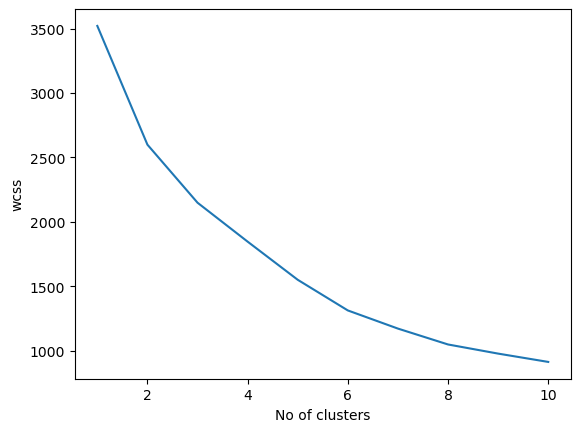

In [14]:
plt.plot(range(1, 11), wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
km = KMeans(n_clusters=5, n_init=20)

In [16]:
km.fit(scales_data)

KMeans(n_clusters=5, n_init=20)

In [17]:
# to show the cluster label of each data point
cluster_labels = km.predict(scales_data)

In [18]:
cluster_labels

array([3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 2, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 0, 3, 3, 1, 1, 3, 3, 1, 1, 0, 3, 1, 1, 3, 0, 3, 3, 1, 0,
       1, 3, 1, 1, 1, 2, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 0, 0, 2,
       1, 1, 1, 1, 0, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 0, 4, 4, 3, 4, 3, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 3, 4, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 4, 3, 3, 4, 3,

In [19]:
pd.Series(cluster_labels).value_counts()

1    207
3    126
4     91
0     10
2      6
dtype: int64

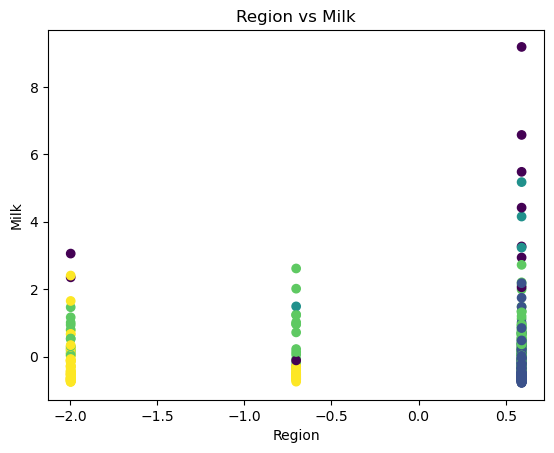

In [20]:
plt.scatter(scales_data['Region'], scales_data['Milk'], c = cluster_labels)
plt.xlabel('Region')
plt.ylabel('Milk')
plt.title('Region vs Milk')
plt.show()

In [21]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [22]:
mergings = linkage(scales_data , method='centroid')
# methods : min, max, average etc

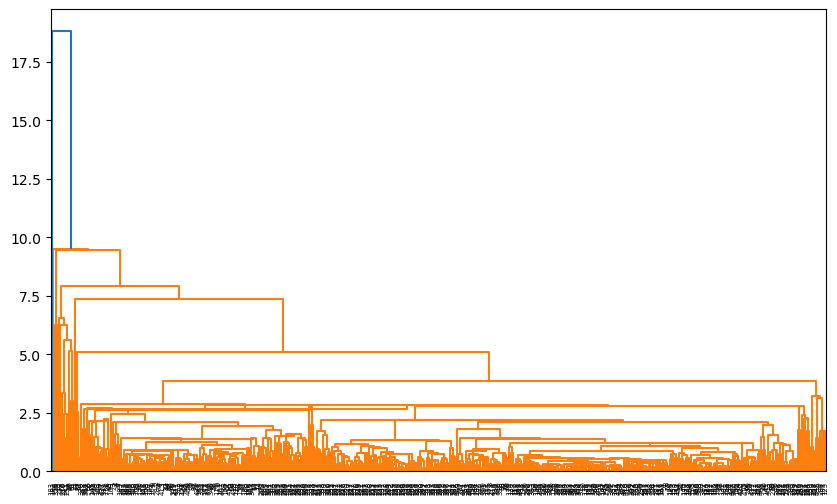

In [23]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [24]:
cluster_labels = fcluster(mergings, 15, criterion='distance')

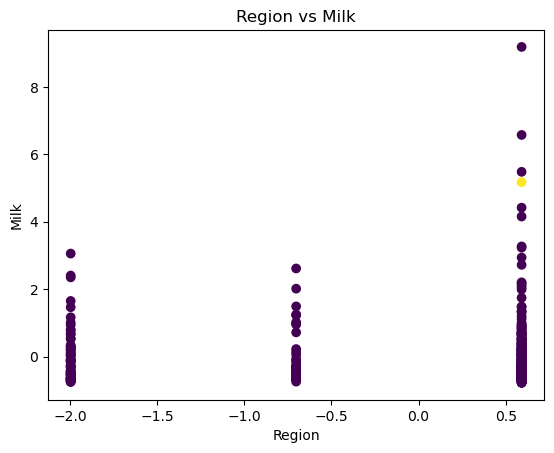

In [25]:
plt.scatter(scales_data['Region'], scales_data['Milk'], c = cluster_labels)
plt.xlabel('Region')
plt.ylabel('Milk')
plt.title('Region vs Milk')
plt.show()

In [26]:
# PCA

In [27]:
from sklearn.preprocessing import scale

In [28]:
scaled_data = pd.DataFrame(scale(data), index = data.index, columns = data.columns)

In [29]:
scaled_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA()

In [32]:
# principle components
pc_array = pca.fit_transform(scaled_data)

In [33]:
pc_array.shape

(440, 8)

In [34]:
pc_data1 = pd.DataFrame(pc_array, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])

In [35]:
pc_data1

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,-0.939441,0.654762,0.018102
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458,-0.867227,0.511022,0.077895
2,1.269141,0.682055,-0.664095,1.634953,-1.193813,-1.078442,-0.203152,-0.254037
3,-1.056782,0.610821,-0.505654,0.196005,0.457855,0.116959,-0.313804,0.054377
4,0.634030,0.974199,-0.771209,0.186374,-0.813877,-1.505372,-0.160399,0.003763
...,...,...,...,...,...,...,...,...
435,0.222884,2.480505,-0.360936,-0.601036,1.109212,0.364851,0.346184,0.860980
436,-1.290172,1.560397,-0.756171,-1.342401,-0.533462,-0.205789,-0.242280,-0.226984
437,3.865149,-0.479854,-0.525345,-0.687132,0.108968,0.280320,-0.575297,-0.089003
438,-1.097067,-0.069896,-0.630128,0.311821,-0.424792,0.335170,-0.153744,-0.037308


In [36]:
pc_data1.corr().round(1)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
pc1,1.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
pc2,-0.0,1.0,0.0,0.0,0.0,0.0,-0.0,0.0
pc3,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0
pc4,0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0
pc5,-0.0,0.0,0.0,-0.0,1.0,0.0,0.0,-0.0
pc6,-0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0
pc7,0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,0.0
pc8,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,1.0


In [37]:
pca.explained_variance_

array([3.10707136, 1.79404441, 1.0140786 , 0.74007428, 0.55790035,
       0.46035462, 0.28176643, 0.06293318])

In [38]:
pca.explained_variance_ratio_ * 100

array([38.75012291, 22.37458795, 12.64717345,  9.22990372,  6.95790497,
        5.74135444,  3.51407568,  0.78487688])

In [39]:
# sum of above array
sum = 0
for num in [38.75012291, 22.37458795, 12.64717345,  9.22990372,  6.95790497,
        5.74135444,  3.51407568,  0.78487688]:
    sum += num
    
print(sum)

100.0


In [40]:
pca = PCA(n_components = 6)

In [41]:
# principle components
pc_array2 = pca.fit_transform(scaled_data)

In [42]:
pc_array2.shape

(440, 6)

In [43]:
pc_data2 = pd.DataFrame(pc_array2, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

In [44]:
pc_data2.corr().round(1)

,pc1,pc2,pc3,pc4,pc5,pc6
pc1,1.0,-0.0,-0.0,0.0,-0.0,-0.0
pc2,-0.0,1.0,0.0,0.0,0.0,0.0
pc3,-0.0,0.0,1.0,-0.0,0.0,0.0
pc4,0.0,0.0,-0.0,1.0,-0.0,-0.0
pc5,-0.0,0.0,0.0,-0.0,1.0,0.0
pc6,-0.0,0.0,0.0,-0.0,0.0,1.0


In [45]:
pca.explained_variance_

array([3.10707136, 1.79404441, 1.0140786 , 0.74007428, 0.55790035,
       0.46035462])

In [46]:
pca.explained_variance_ratio_ * 100

array([38.75012291, 22.37458795, 12.64717345,  9.22990372,  6.95790497,
        5.74135444])

In [47]:
sum = 0
for num in [38.75012291, 22.37458795, 12.64717345,  9.22990372,  6.95790497,
        5.74135444]:
    sum += num
    
print(sum)

95.70104744


In [48]:
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, n_init=20)
  km.fit(pc_data1)
  css = km.inertia_
  wcss.append(css)

In [49]:
wcss

[3520.0000000000014,
 2599.384423783624,
 2149.2839562217587,
 1851.7595764506564,
 1548.8659343652657,
 1314.680028081255,
 1173.0105551078702,
 1050.0903086785106,
 985.475649292771,
 901.8298297582523]

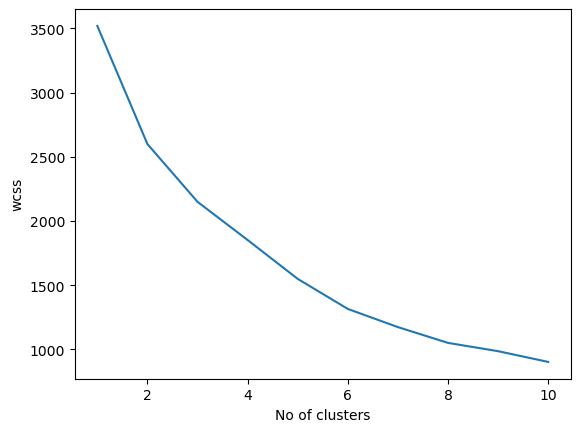

In [50]:
plt.plot(range(1, 11), wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [51]:
km = KMeans(n_clusters=5, n_init=20)

In [52]:
km.fit(pc_data1)

KMeans(n_clusters=5, n_init=20)

In [53]:
cluster_labels = km.predict(pc_data1)

In [54]:
cluster_labels

array([1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3,
       3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 4, 1, 1, 3, 3, 1, 1, 3, 3, 4, 1, 3, 3, 1, 4, 1, 1, 3, 4,
       3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 4, 4, 3,
       3, 3, 3, 3, 4, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 4, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 0, 1, 1, 0, 1,

In [55]:
pd.Series(cluster_labels).value_counts()

3    210
1    126
0     91
4     10
2      3
dtype: int64

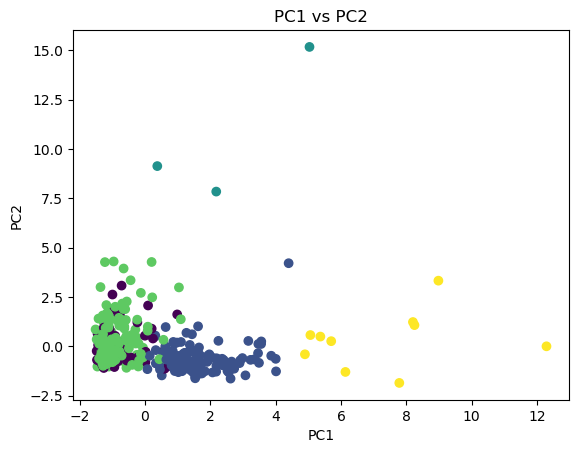

In [56]:
plt.scatter(pc_data1['pc1'], pc_data1['pc2'], c = cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()